# **01-LinearRegression**

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

**Menu**
- Linear Regression

### **Linear Regression**

Epoch [5/60], Loss: 38.8617
Epoch [10/60], Loss: 15.9199
Epoch [15/60], Loss: 6.6256
Epoch [20/60], Loss: 2.8601
Epoch [25/60], Loss: 1.3345
Epoch [30/60], Loss: 0.7162
Epoch [35/60], Loss: 0.4655
Epoch [40/60], Loss: 0.3638
Epoch [45/60], Loss: 0.3224
Epoch [50/60], Loss: 0.3054
Epoch [55/60], Loss: 0.2984
Epoch [60/60], Loss: 0.2953


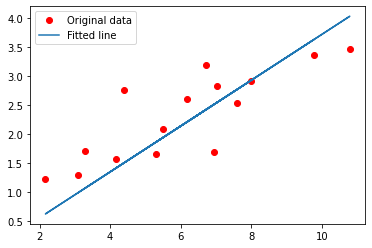

In [8]:
# Hyper parameter
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy Dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


# Linear Regression Model
model = nn.Linear(input_size, output_size)

# LOss and optimization
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Traing rhe model
model.train()
for epoch in range(num_epochs):
    # Conver numpy arrats to toch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)    
    
    # Forward
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward & optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        
# Plot the graph
model.eval()
with torch.no_grad():
    predicted = model(torch.from_numpy(x_train)).detach().numpy()
    plt.plot(x_train, y_train, 'ro', label='Original data')
    plt.plot(x_train, predicted, label='Fitted line')
    plt.legend()
    plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), './model/model_linearRegression.ckpt')